In [1]:
# Analyze Accuracy of Live Dead Predictions

import pandas as pd
import os
import sys
import glob
from os.path import expanduser



%load_ext autoreload
%reload_ext autoreload
%autoreload 2

install_pysd2cat = False
if install_pysd2cat:
    print(os.getcwd())
    os.chdir(os.path.join(expanduser("~"), 'tacc-work/sd2nb/pysd2cat'))
    #os.chdir('..')
    !{sys.executable} setup.py develop --user --uninstall
    !{sys.executable} setup.py develop --user 
    os.chdir(os.pardir)

from pysd2cat.analysis import live_dead_analysis as lda

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
#Get the input data to make the live dead predictions
xplan_base_dir = os.path.join(expanduser("~"), 'sd2e-projects/sd2e-project-14/xplan-reactor')


my_path = os.path.join(xplan_base_dir, 'data/transcriptic')
data = glob.glob(os.path.join(my_path, '*.csv'))
data = [ x for x in data if 'mefl' not in x]



In [169]:

if os.path.exists("live_dead_class_balance.csv"):
    balance = pd.read_csv("live_dead_class_balance.csv", index_col=0)
else:
    balance = pd.DataFrame()
    for d in data:
        run_id=d.split("/")[-1].split('.')[0]
        print(run_id)
        df = pd.read_csv(d)
        count_lc = len(df.loc[df['strain_name'].str.contains('WT-Live-Control')])
        count_dc = len(df.loc[df['strain_name'].str.contains('WT-Dead-Control')])
        balance = balance.append({'run' : run_id, 'num_live' : count_lc, 'num_dead' : count_dc}, ignore_index=True)
    balance.to_csv("live_dead_class_balance.csv")

In [203]:
#Analyse the runs

#df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})

def extract_run(x):
    description = x['Data and Split Description']
    run = get_run_from_description(description)
    return run

def extract_stain(x):
    description = x['Data and Split Description']
    stain_str = description.split('_')[4:]
    return stain_str[0] != 'no'

def get_random_state(x):
    return x['Data and Split Description'].split('_')[2]

def get_run_from_description(d):
    run = "_".join(d.split('_')[0:2])
    return run

def get_run_from_path(p):
    run = p.split('/')[-1].split('.')[0]
    return run



def get_leader_board_df():
 
    leader_board = pd.read_html(os.path.join(my_path, 'test_harness_results/custom_classification_leaderboard.html'))[0]
    leader_board = leader_board.sort_values(by=['Date', 'Time'], ascending=True)

    leader_board=leader_board.dropna()
    leader_board = leader_board.loc[leader_board['Data and Split Description'].str.contains('__')]

    leader_board.loc[:, 'run'] = leader_board.apply(extract_run, axis = 1)
    leader_board.loc[:, 'stain'] = leader_board.apply(extract_stain, axis = 1)
    leader_board.loc[:,'random_state'] = leader_board.apply(get_random_state, axis=1)
    return leader_board

def case_exists(leader_board_df, input_file, rand, stain):
    match = leader_board_df.loc[(leader_board_df['run'] == get_run_from_path(input_file)) &(leader_board_df['random_state'] == str(rand)) & (leader_board_df['stain'] == stain)]
    return len(match) > 0
    
    
leader_board_df = get_leader_board_df()

leader_board = leader_board_df.merge(balance, on='run')
leader_board.to_csv('live_dead_leaderboard.csv')
print(len(leader_board))
#print(leader_board.stain.unique())
#leader_board[['run', 'stain', 'random_state']].groupby(['run', 'stain']).agg(len)
#leader_board[['Data and Split Description', 'stain']]

980


[0, 1, 0.6, 1]

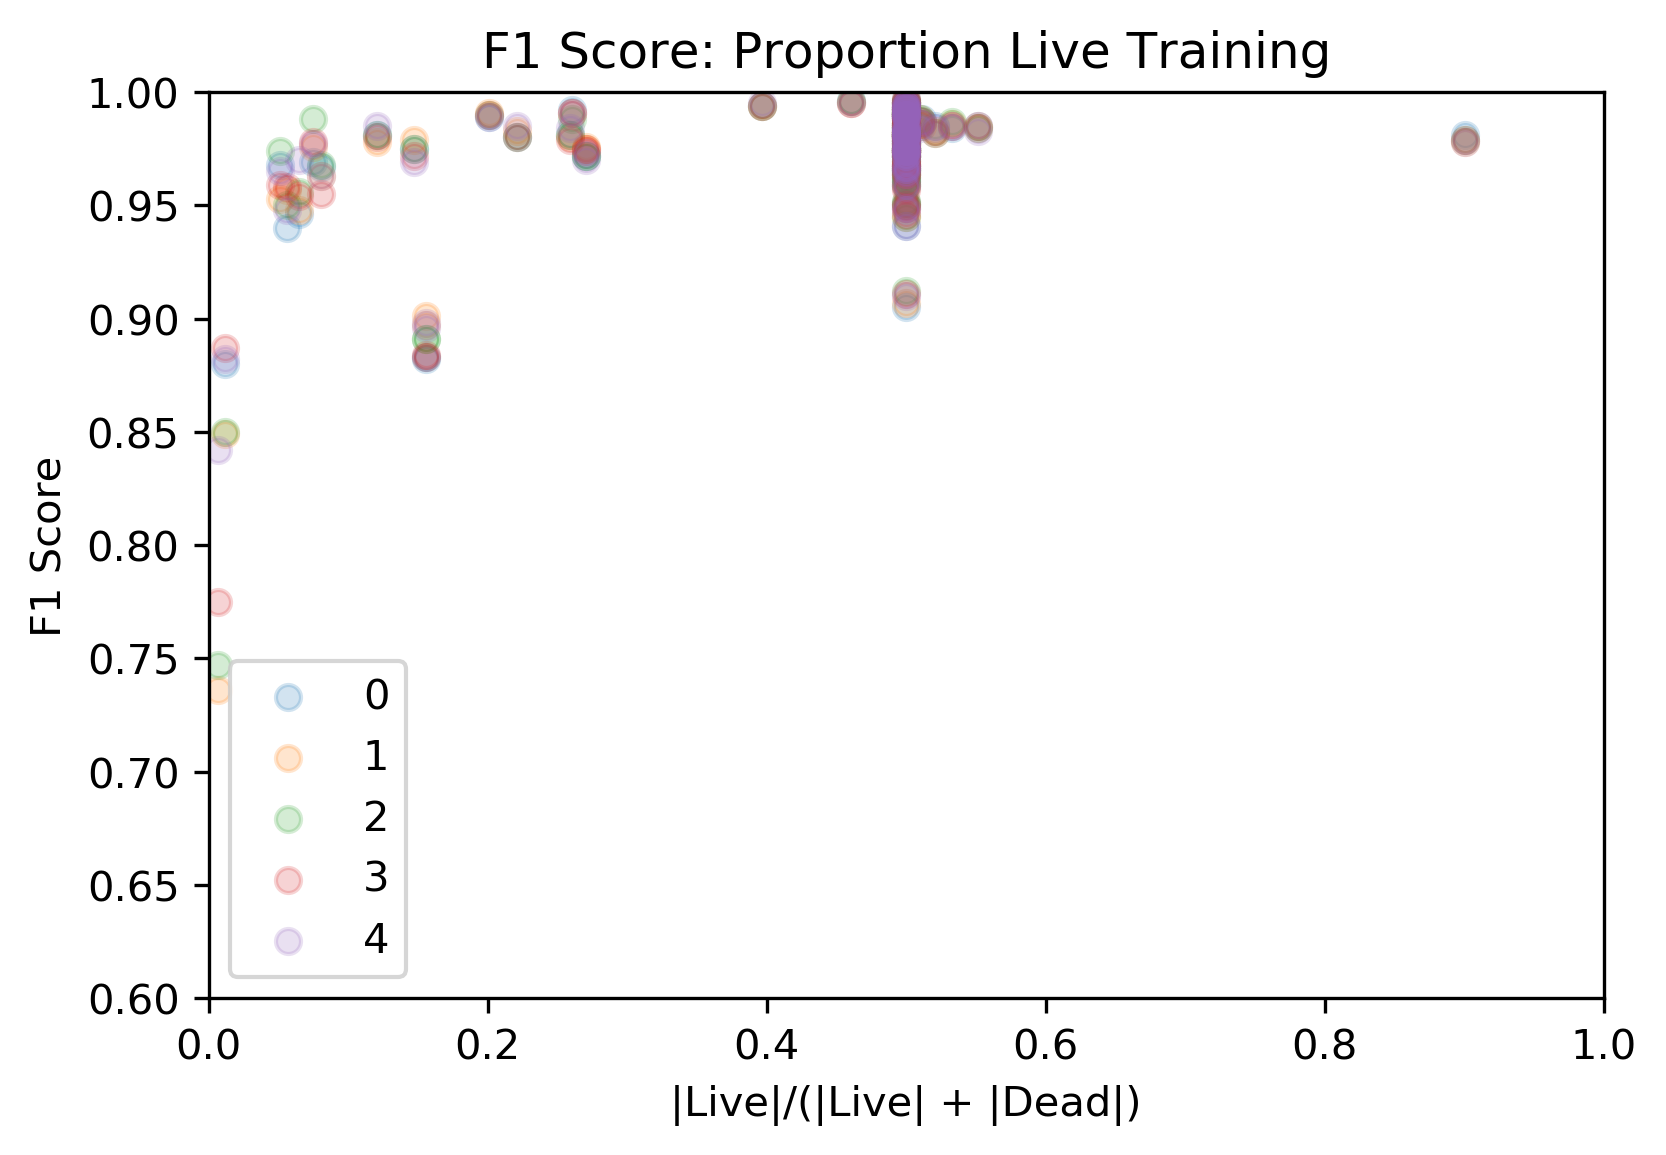

In [204]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline

fig = plt.figure(dpi=300)
ax = plt.axes()

#metric='F1 Score'
metric='Accuracy'
metric='F1 Score'
#metric='Precision'

for rs in leader_board.random_state.unique():
    df = leader_board.loc[(leader_board['random_state'] == rs) & (leader_board['stain'] == True)]
    xvals = df['num_live']/(df['num_live']+df['num_dead'])
    yvals = df[metric]
    ax.scatter(xvals, yvals, label=rs, alpha=0.2)


ax.set_title(metric + ': Proportion Live Training')
ax.set_xlabel('|Live|/(|Live| + |Dead|)')
ax.set_ylabel(metric)
plt.legend()

lims = [ 0, 1
]

#ax.plot(lims, lims, 'k-', alpha=0.25, zorder=0)

#plt.axis('equal')
plt.axis([0, 1, 0.6, 1])
#plt.gca().set_aspect('equal', adjustable='box')



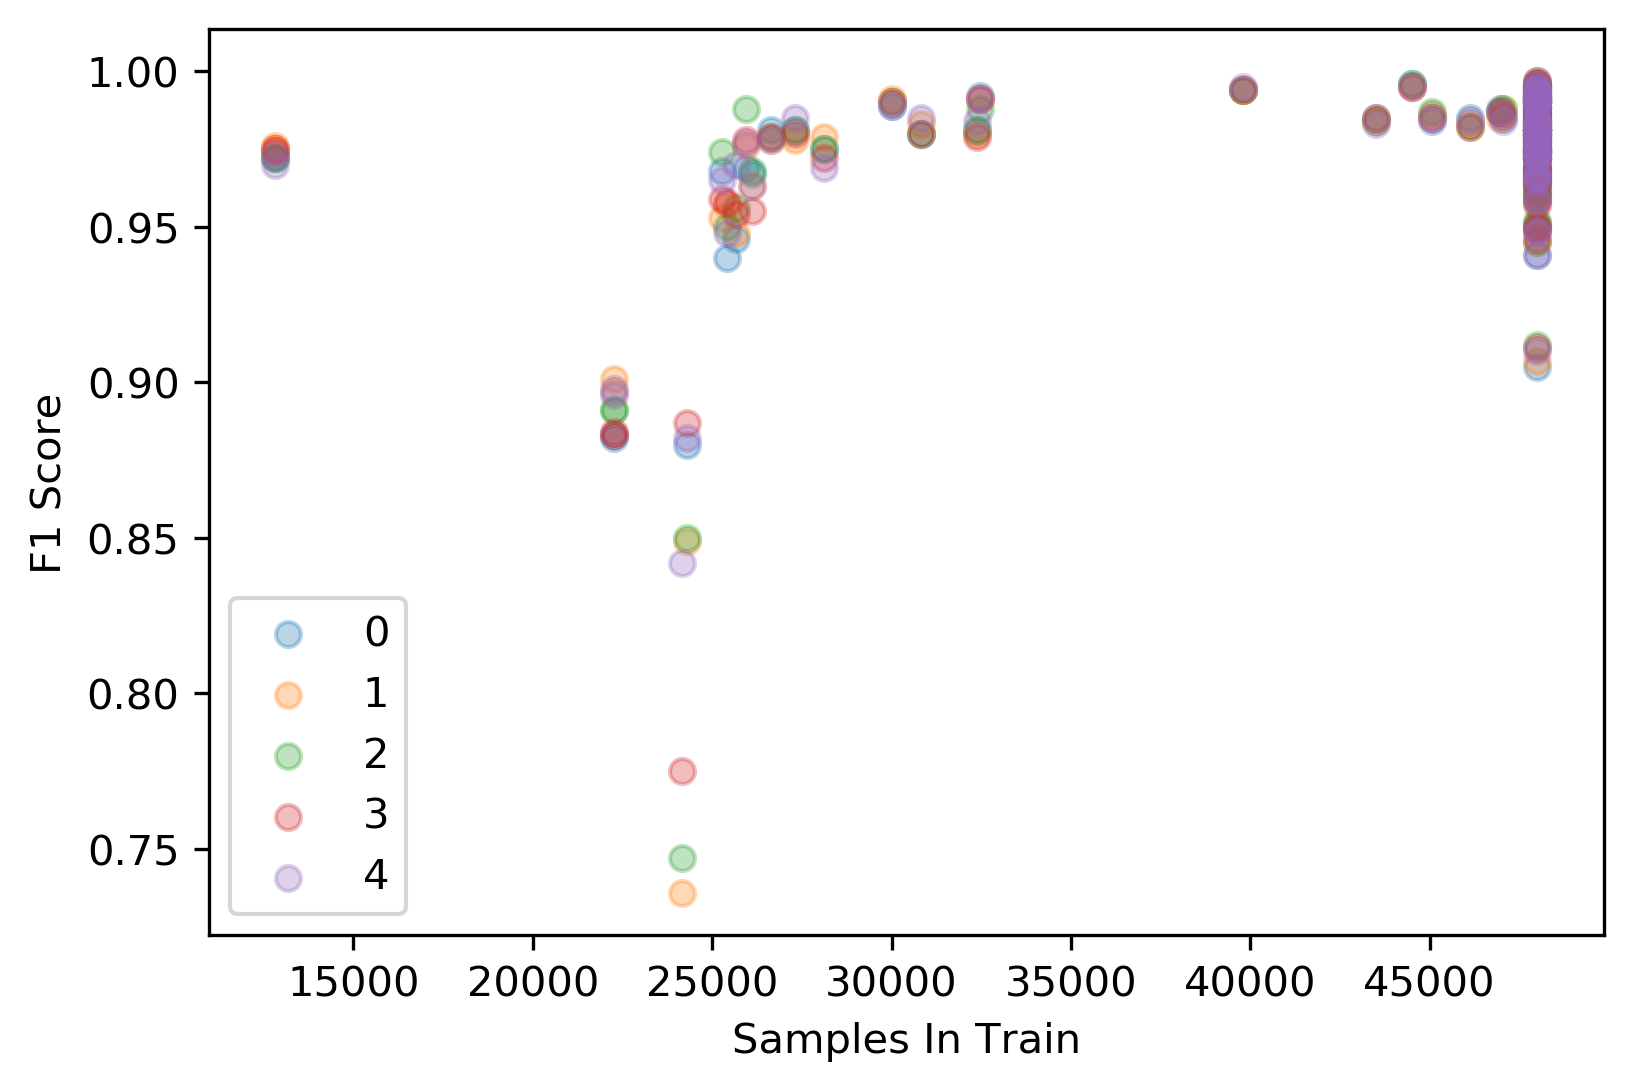

In [205]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline

fig = plt.figure(dpi=300)
ax = plt.axes()

#metric='F1 Score'
#metric='Accuracy'
metric='Recall'
metric='F1 Score'





ax.set_xlabel('Samples In Train')
ax.set_ylabel(metric)

for rs in leader_board.random_state.unique():
    df = leader_board.loc[(leader_board['random_state'] == rs) & (leader_board['stain'] == True)]
    xvals = df['Samples In Train']
    yvals = df[metric]

    ax.scatter(xvals, yvals, label=rs, alpha=0.3)


plt.legend()
lims = [ 0, 1
]

#ax.plot(lims, lims, 'k-', alpha=0.25, zorder=0)

#plt.axis('equal')
#plt.axis([0, 1, 0, 1])
#plt.gca().set_aspect('equal', adjustable='box')



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


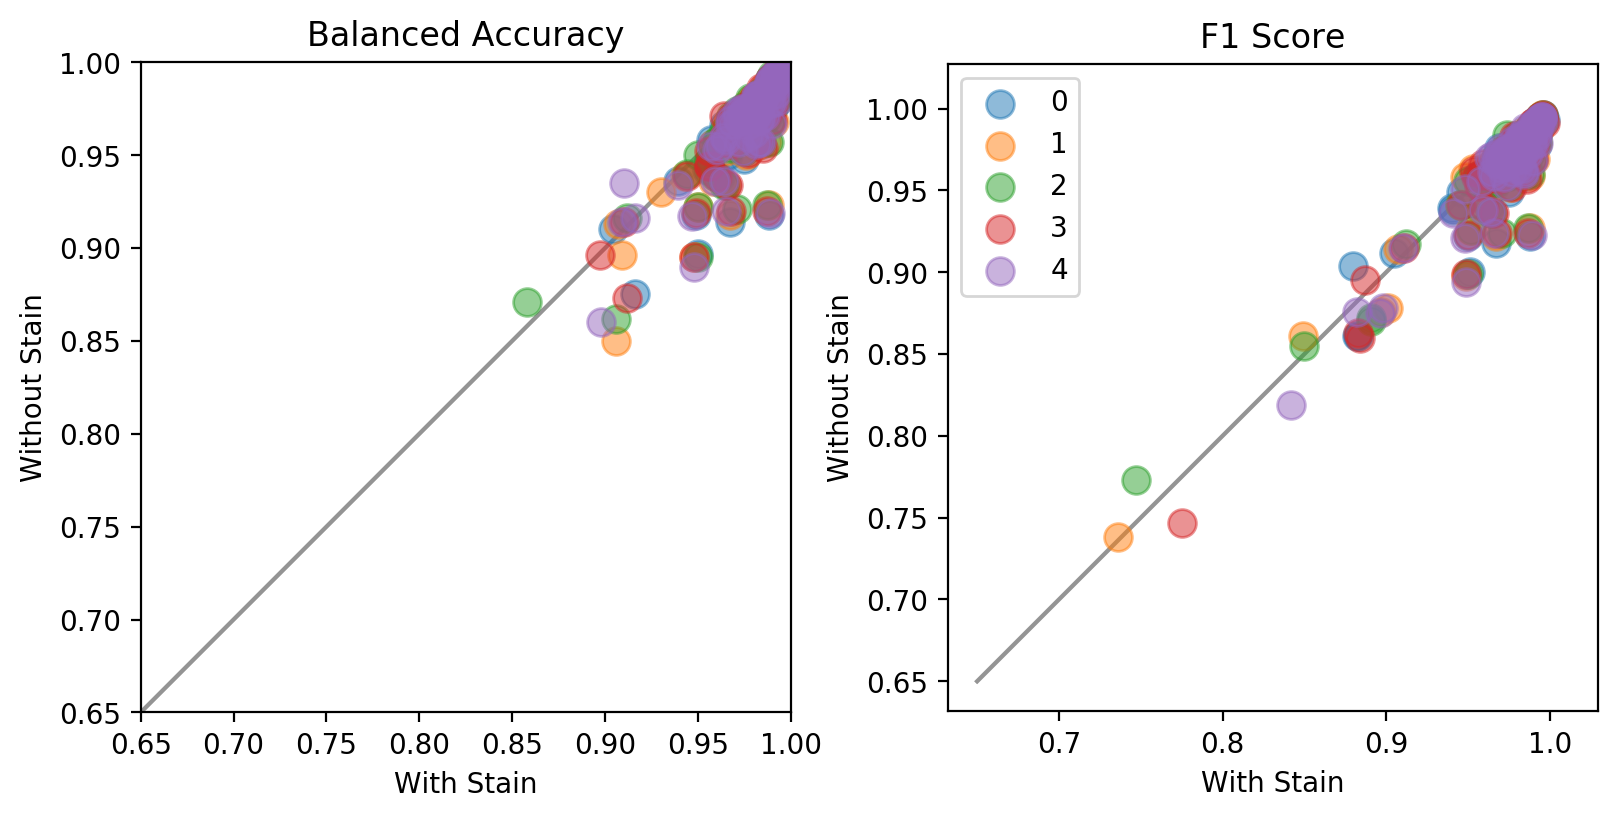

In [208]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline


#metric='F1 Score'
#metric='Accuracy'
#metrics=['Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics=['Balanced Accuracy', 'F1 Score']

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(4*len(metrics), 4), dpi=200)
#plt.rcParams['font.size'] = 1




stain = leader_board.loc[(leader_board['stain'] == True) ]
no_stain = leader_board.loc[(leader_board['stain'] == False) ]

plot_df = stain.merge(no_stain, on=['run', 'random_state'], how='inner')



for j, col in enumerate(ax):

    for rs in plot_df.random_state.unique():
        df = plot_df.loc[plot_df['random_state'] == rs]

        xvals=df[metrics[j]+"_x"]
        yvals=df[metrics[j]+"_y"]


        col.set_xlabel("With Stain")
        col.set_ylabel("Without Stain")

        col.scatter(xvals, yvals,s=100, alpha=0.5, label=rs)

        lims = [ .65, 1
        ]

        col.plot(lims, lims, 'k-', alpha=0.1, zorder=0)
        col.set_title(metrics[j])
        col.set_xlim([0.65, 1])
        col.set_ylim([0.65, 1])
        col.set(adjustable='box', aspect='equal')
        #plt.axis([0.85, 1, 0.85, 1])
        plt.legend()
        plt.axis('equal')
        plt.gca().set_aspect('equal', adjustable='box')



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)





In [207]:
 plot_df.apply(lambda x: x['Balanced Accuracy_x'] - x['Balanced Accuracy_y'], axis=1).agg([np.mean, np.std])

#plot_df.columns

mean    0.007842
std     0.012440
dtype: float64

Text(0.5, 1.0, 'Class Imbalance for Live Dead Prediction')

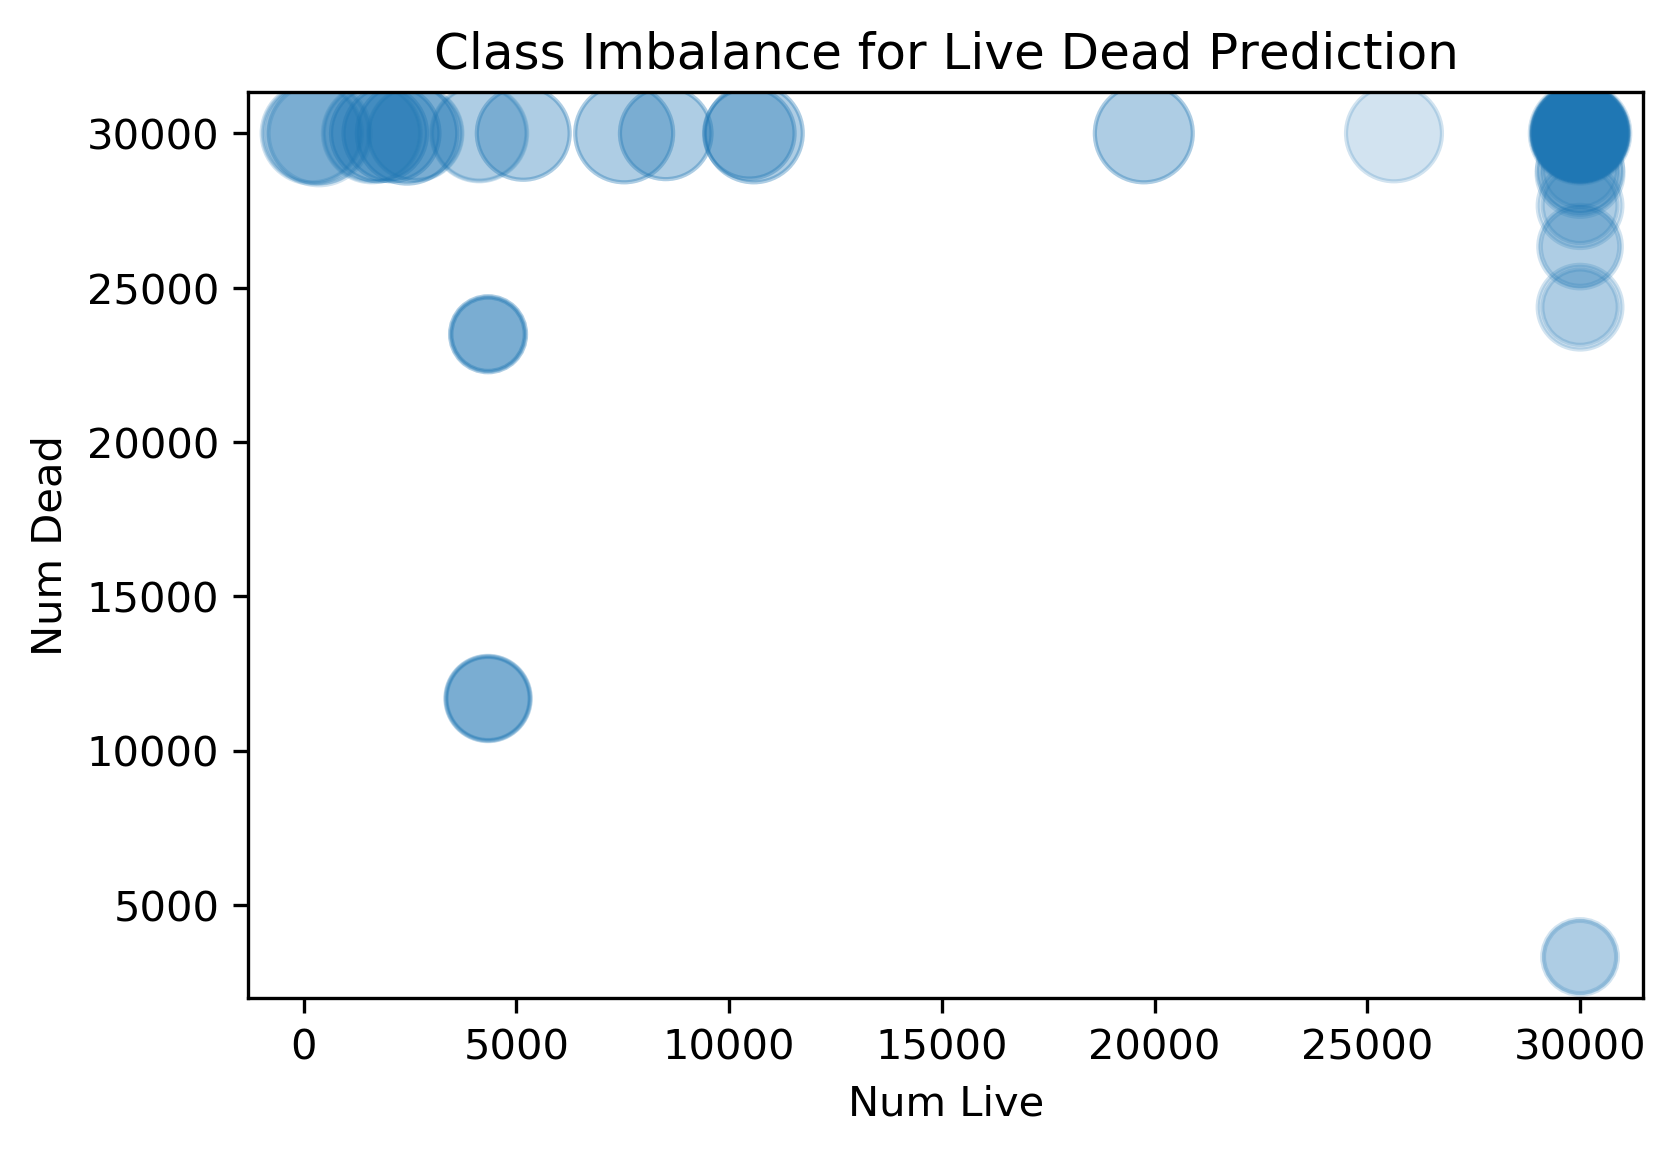

In [79]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline

fig = plt.figure(dpi=300)
ax = plt.axes()
#metric='F1 Score'
metric='Accuracy'
#live=[x['live'] for k,x in balance.items() ]
#dead=[x['dead'] for k,x in balance.items() ]

#indices=range(0,len(live))
#width = np.min(np.diff(indices))/3

#ax.bar(indices-width, live, width, label = 'Live')
#ax.bar(indices, dead, width, label = 'Dead')
leader_board.loc[:, 'size'] = leader_board.apply(lambda x: -100*np.log(1-x[metric]), axis=1)

ax.scatter(leader_board['num_live'], leader_board['num_dead'], s=leader_board['size'],alpha=0.2)
ax.set_xlabel('Num Live')
ax.set_ylabel('Num Dead')
ax.set_title('Class Imbalance for Live Dead Prediction')
#plt.legend()